In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
#downsampling
train_series = pd.read_parquet('train_series.parquet', engine = 'pyarrow')
series_id = train_series['series_id'].unique()
every_6th_ID = series_id[0::6]
every_6th_data = train_series[train_series['series_id'].isin(every_6th_ID)]

In [47]:
#every_6th_data

In [48]:
train_events = pd.read_csv('train_events.csv')

lst_IDs = every_6th_data['series_id'].unique()

print(lst_IDs)

['038441c925bb' '062dbd4c95e6' '0d0ad1e77851' '10469f6765bf'
 '137b99e936ab' '1762ab70ec76' '1c7c0bad1263' '2654a87be968'
 '2b0a1fa8eba8' '2fc653ca75c7' '35826366dfc7' '3aceb17ef7bd'
 '405df1b41f9f' '4743bdde25df' '4feda0596965' '55a47ff9dc8a'
 '5c55a5e717d6' '601559e1777d' '67f5fc60e494' '6ee4ade1f2bd'
 '73fb772e50fb' '7822ee8fe3ec' '808652a666c6' '8898e6db816d'
 '8b8b9e29171c' '91127c2b0e60' '99237ce045e4' '9ddd40f2cb36'
 'a3e59c2ce3f6' 'a9a2f7fac455' 'b1831c4979da' 'b7fc34995d0f'
 'bf00506437aa' 'c38707ef76df' 'c75b4b207bea' 'ca730dbf521d'
 'cf13ed7e457a' 'd2d6b9af0553' 'd8de352c2657' 'dc80ca623d71'
 'e0686434d029' 'e2b60820c325' 'e6ddbaaf0639' 'ece2561f07e9'
 'f2c2436cf7b7' 'f8a8da8bdd00' 'fe90110788d2']


In [69]:
filtered_events = train_events[train_events['series_id'].isin(lst_IDs)]


#filtered_events

In [73]:
#print(list(filtered_events['event']))

merged_data = pd.merge(every_6th_data, filtered_events, on=['timestamp', 'series_id'], how='left')

#merged_data

In [74]:
def plot_data(merged_data,series_ID):
    a, plot = plt.subplots(2, 1, figsize=(20, 8))

    merged_data1 = merged_data[merged_data['series_id'] == series_ID]

    
    for i in range(len(merged_data1)):
        
        if merged_data1['event'].values[i] == 'onset':
            plot[1].axvline(merged_data1.index[i], linestyle="--", color="green")
            plot[0].axvline(merged_data1.index[i], linestyle="--", color="green")

        if merged_data1['event'].values[i] == 'wakeup':
            plot[1].axvline(merged_data1.index[i], linestyle='--', color='red')
            plot[0].axvline(merged_data1.index[i], linestyle='--', color='red')

    plot[0].plot(merged_data1.index, merged_data1['enmo'])
    plot[0].set_ylabel('enmo')
    plot[0].set_xlabel('step')

    plot[1].plot(merged_data1.index, merged_data1['anglez'])
    plot[1].set_ylabel('anglez')
    plot[1].set_xlabel('step')

    plt.show()

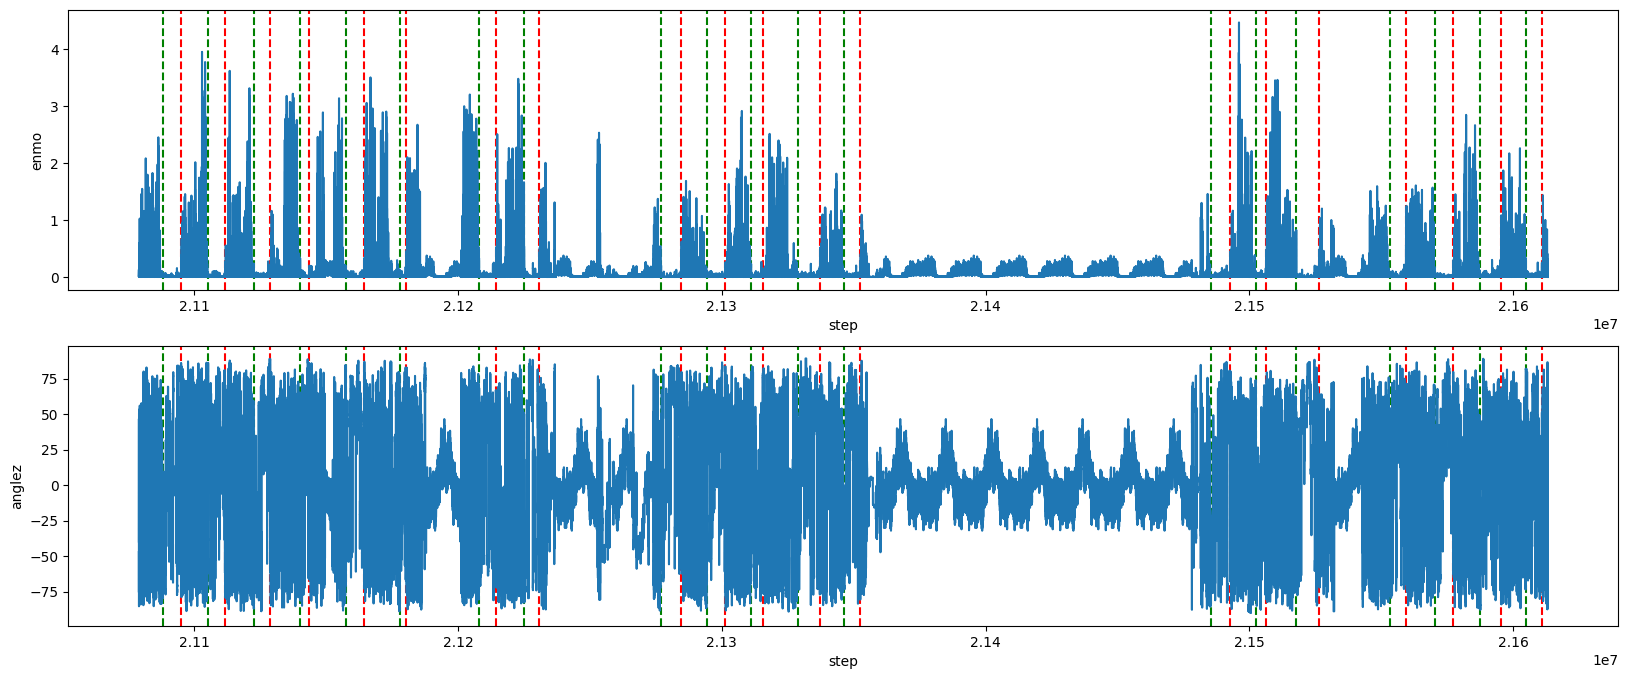

In [77]:
plot_data(merged_data,'ece2561f07e9')

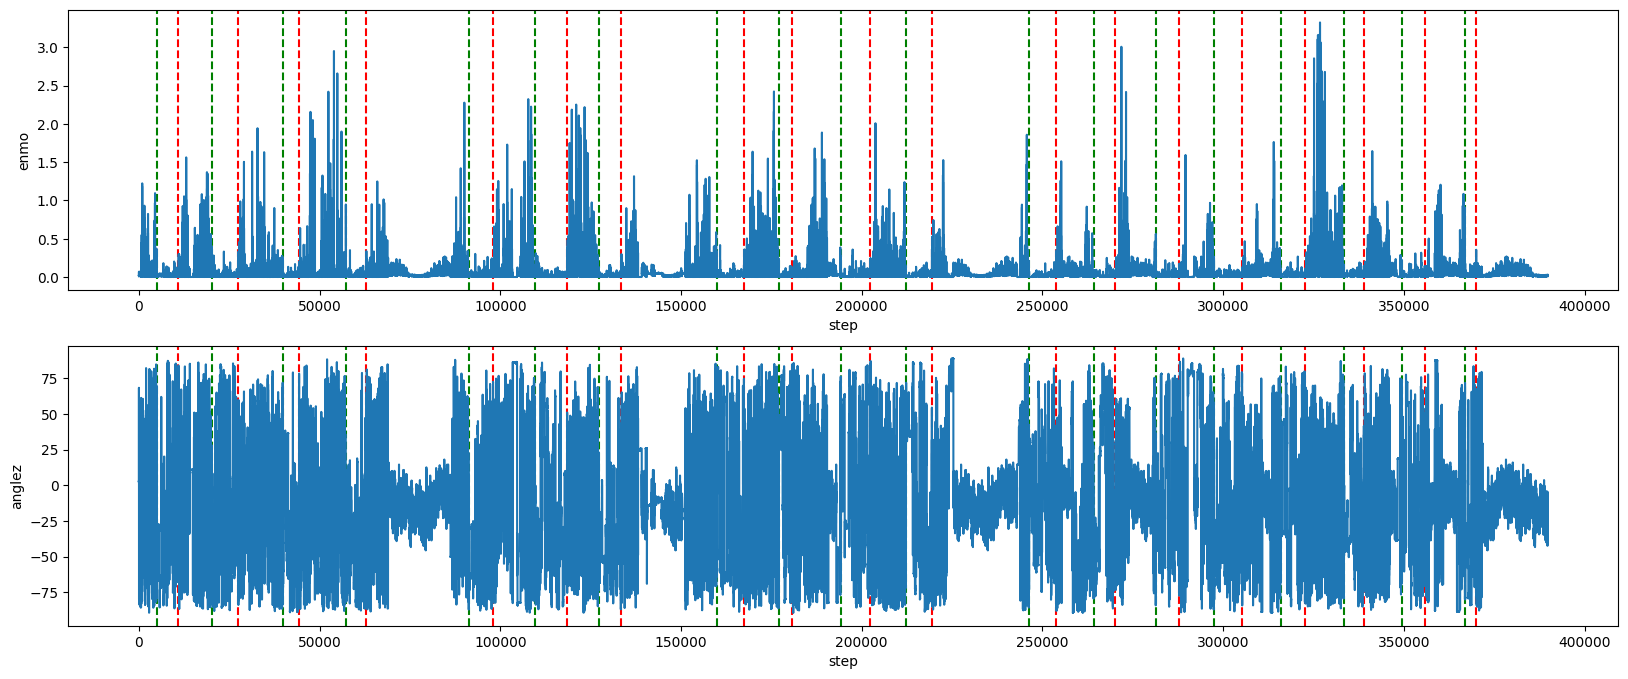

In [78]:
plot_data(merged_data,'038441c925bb')

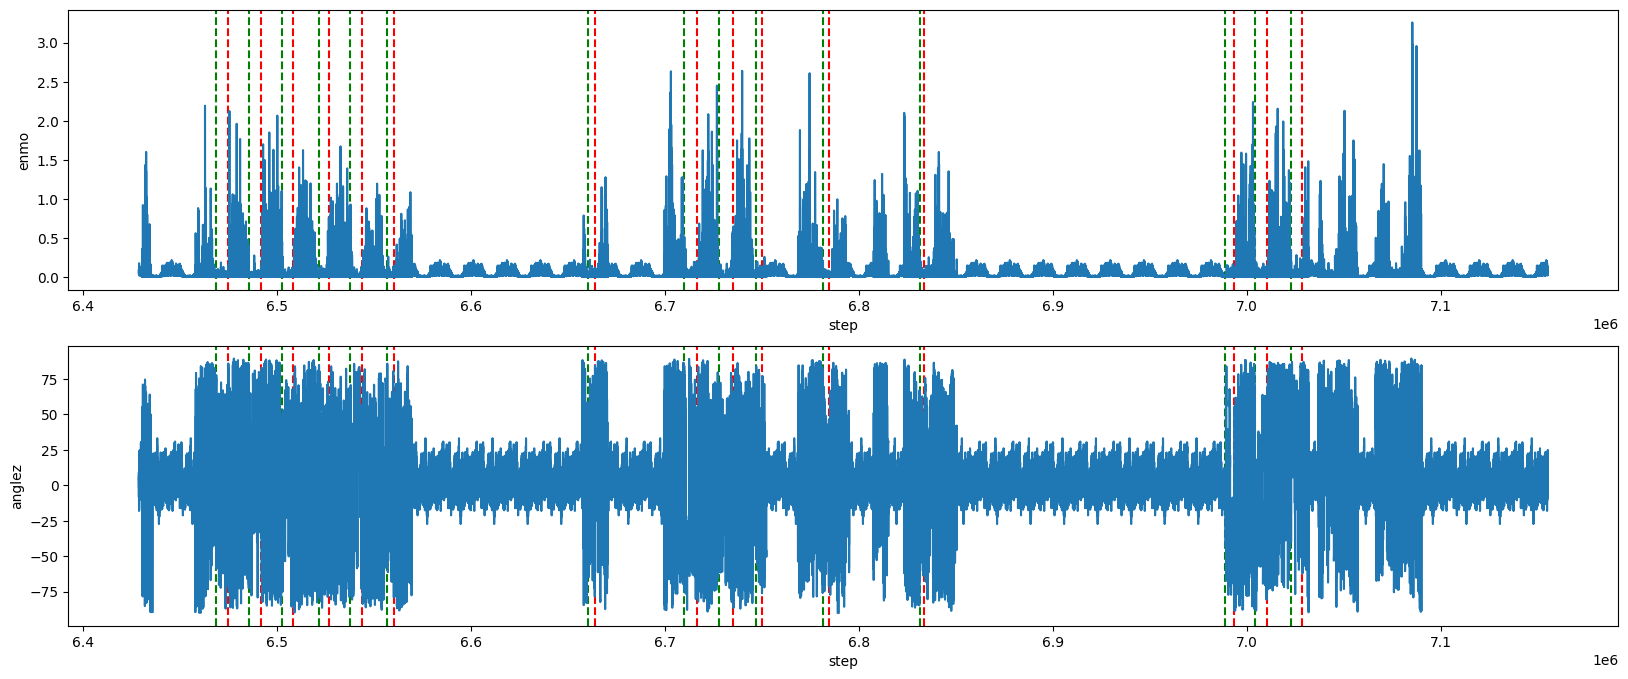

In [79]:
plot_data(merged_data,'4feda0596965')

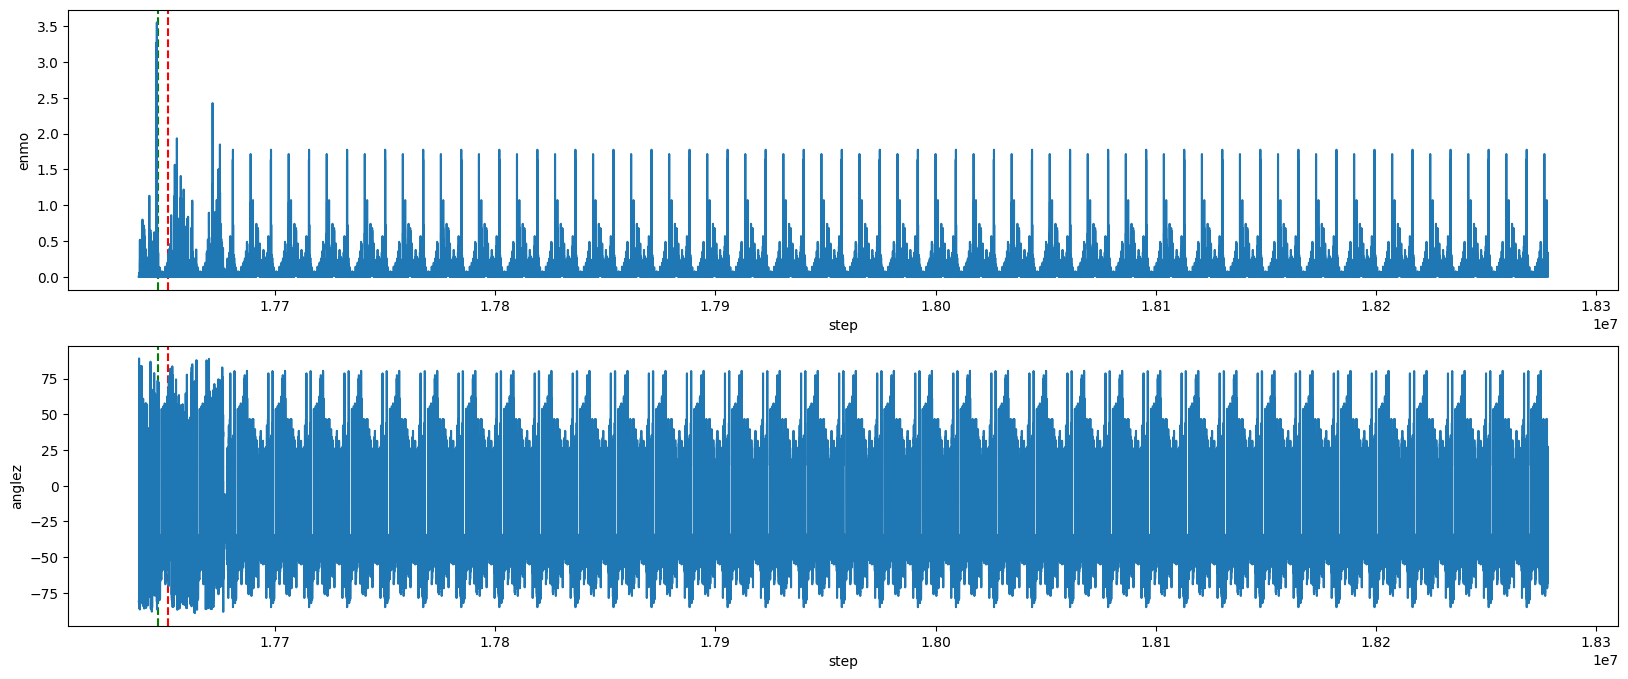

In [80]:
plot_data(merged_data,'cf13ed7e457a')